In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Algerian_forest_fires_dataset_cleaned_dataset.csv")

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [9]:
# Endoding the column Classes since it is categorical data
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [11]:
df["Classes"]=np.where(df['Classes'].str.contains("not fire"),0,1)

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [13]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [14]:
## Taking temperature as the dependent variable
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
X = df[['day', 'month', 'year', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']]

In [19]:
y = df['Temperature']
y

0      29
1      29
2      26
3      25
4      27
       ..
238    30
239    28
240    27
241    24
242    24
Name: Temperature, Length: 243, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state = 42)

In [22]:
print(X_train.shape)
y_train.shape

(170, 14)


(170,)

In [23]:
## Standardize of feature scaling of the datasets

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [26]:
X_train

array([[ 1.56765151, -1.30687831,  0.        , ...,  0.74777936,
         0.90992142, -1.        ],
       [ 1.45605153,  1.39153439,  0.        , ..., -0.91039641,
        -1.098996  , -1.        ],
       [ 0.78645164,  1.39153439,  0.        , ..., -0.83266942,
        -1.098996  , -1.        ],
       ...,
       [-1.66874796,  1.39153439,  0.        , ..., -0.91039641,
        -1.098996  , -1.        ],
       [ 1.45605153, -0.40740741,  0.        , ...,  0.48868939,
         0.90992142,  1.        ],
       [-0.55274815,  1.39153439,  0.        , ..., -0.88448741,
        -1.098996  , -1.        ]])

In [27]:
X_test

array([[ 1.0096516 , -1.30687831,  0.        , ...,  0.16482694,
         0.90992142, -1.        ],
       [-0.99914807, -1.30687831,  0.        , ...,  0.00937296,
         0.90992142, -1.        ],
       [-1.66874796, -0.40740741,  0.        , ..., -0.85857842,
        -1.098996  ,  1.        ],
       ...,
       [ 0.22845173,  1.39153439,  0.        , ...,  0.07414545,
         0.90992142, -1.        ],
       [-0.77594811,  0.49206349,  0.        , ...,  0.72187036,
         0.90992142,  1.        ],
       [ 0.34005171,  0.49206349,  0.        , ...,  1.30482278,
         0.90992142, -1.        ]])

# Model Training

# 1. Linear Regression Model 

In [31]:
X.columns

Index(['day', 'month', 'year', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
print(regression.coef_)
regression.intercept_

[-5.74597476e-01 -2.63410584e-01 -1.77635684e-15 -9.78503104e-01
 -7.86390285e-01  4.25333866e-01  1.55421559e+00  3.72961293e+00
  2.72322991e+00  5.07158895e-01 -5.26515112e+00 -3.55978754e-01
 -1.09379775e-01 -6.92659363e-02]


32.04117647058823

In [32]:
# Prediction of the test data
reg_pred = regression.predict(X_test)
reg_pred

array([32.83876675, 35.0994096 , 30.55578643, 33.04383601, 31.91519203,
       32.20546181, 31.21637687, 34.65944215, 31.98095975, 30.91527496,
       28.39077668, 39.90350079, 34.33422599, 34.47292738, 34.07365718,
       32.79877682, 32.99342119, 25.91103019, 32.88120593, 34.85633817,
       31.06614308, 28.49964609, 33.34101923, 29.02207193, 36.61885294,
       33.87421949, 33.52990762, 33.57502506, 26.98260264, 33.47380454,
       29.67460023, 32.25543459, 32.21261213, 32.98391615, 32.12628393,
       32.90754349, 31.06535424, 34.28928551, 26.56630131, 20.79061222,
       34.33130273, 32.86333296, 34.29204637, 25.10622477, 36.41943458,
       32.78719883, 30.82116209, 30.75244572, 33.14073391, 28.34621455,
       37.23605829, 35.19475135, 33.6250972 , 34.76443853, 33.29965094,
       32.33477137, 32.26998073, 32.51987299, 31.72981255, 36.21920425,
       33.15265008, 30.14714511, 29.04650884, 36.78396218, 31.62621688,
       31.58693795, 33.20891254, 34.37763206, 35.04078754, 24.49

## First Assumption 

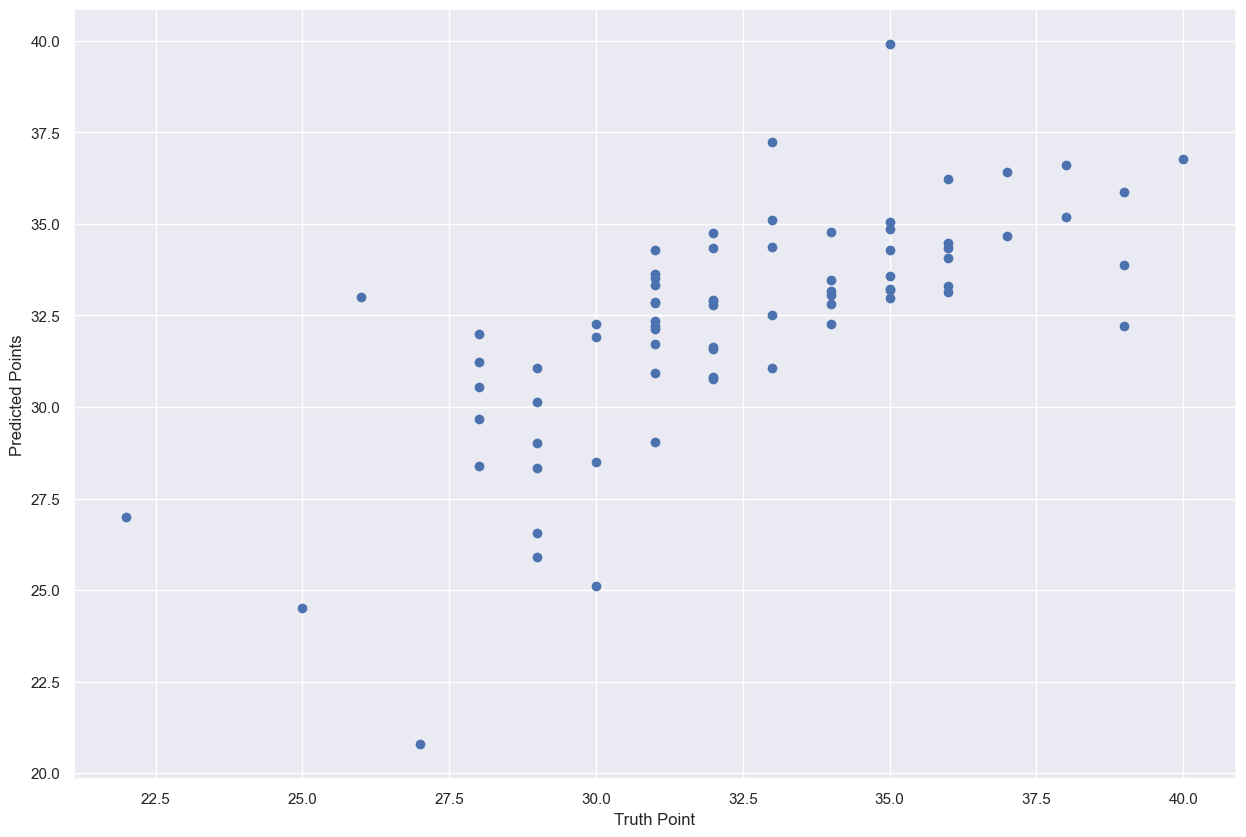

In [39]:
sns.set(rc ={'figure.figsize':(15,10)})
plt.scatter(y_test,reg_pred)
plt.xlabel("Truth Point")
plt.ylabel("Predicted Points")
plt.show()

## Second Assumption

In [40]:
residuals = y_test-reg_pred
residuals

24    -1.838767
6     -2.099410
152   -2.555786
232    0.956164
238   -1.915192
         ...   
194   -0.040788
104    0.500352
109   -2.743338
190    3.126686
79     1.813874
Name: Temperature, Length: 73, dtype: float64

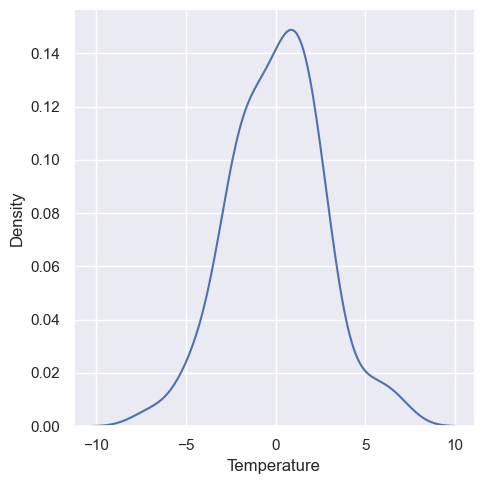

In [41]:
sns.displot(residuals,kind = "kde")

## Third Assumption 

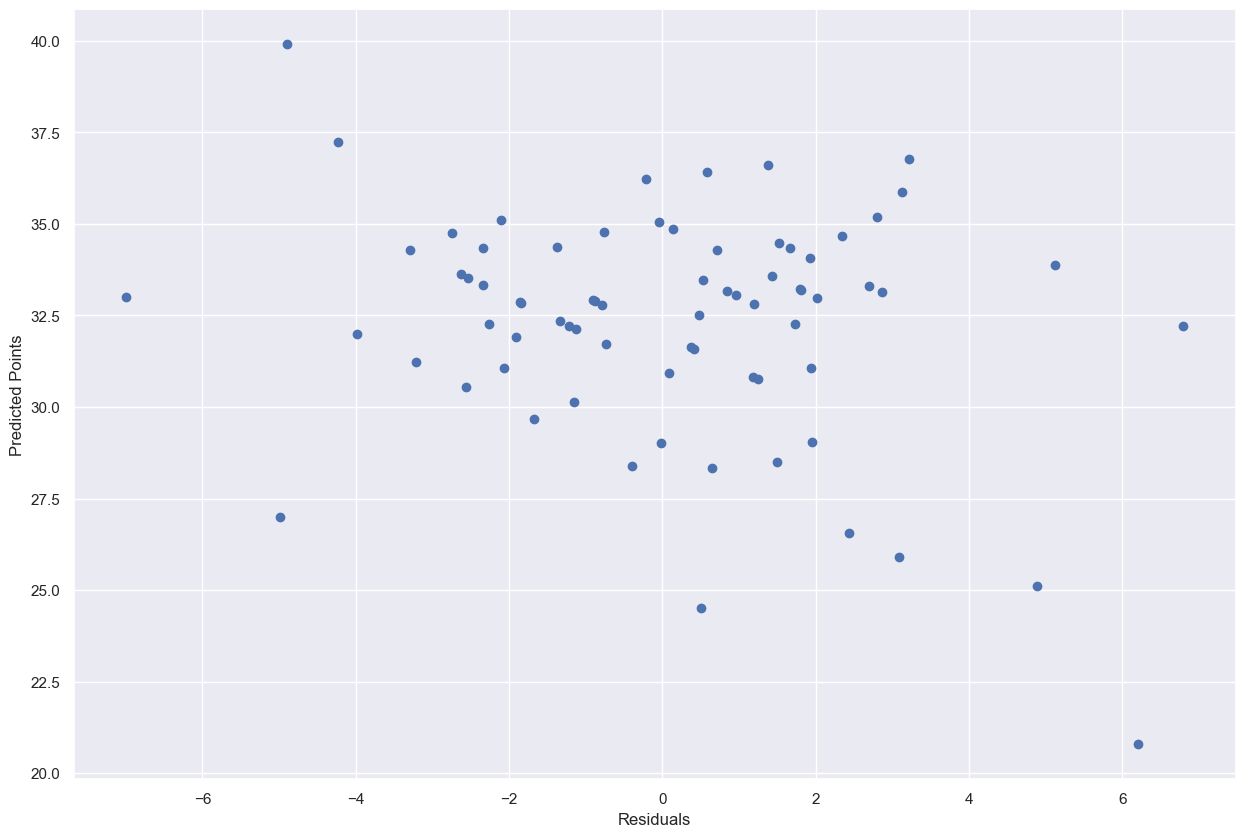

In [42]:
plt.scatter(residuals,reg_pred)
plt.xlabel("Residuals")
plt.ylabel("Predicted Points")
plt.show()

### R squared and adjusted R squared 

In [43]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
score

0.4680619666523834

In [44]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.33966313101675183

# 2. Ridge Regression Model

In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
print(ridge.intercept_)
print(ridge.coef_)

32.04117647058823
[-0.56885228 -0.24175058  0.         -0.97976184 -0.78243965  0.38514692
  1.48244739  0.49643948  1.00668129  0.5196677  -0.47250717 -0.33007818
 -0.10919883 -0.03216801]


In [46]:
ridge_pred = ridge.predict(X_test)
ridge_pred

array([32.87249835, 34.9580473 , 30.54818691, 33.2094914 , 31.84583454,
       32.39369254, 31.22595565, 34.60848889, 31.9760896 , 30.95665998,
       28.38528215, 34.75840636, 34.35112852, 34.35270041, 34.31219516,
       32.8831089 , 32.94887165, 26.02271921, 32.77093888, 34.78863975,
       31.02516877, 28.34059431, 33.32396752, 29.02438651, 36.80363391,
       34.16930112, 33.49955756, 33.66973166, 26.9187331 , 33.33230113,
       29.70815452, 32.22898575, 32.14564252, 33.17386971, 32.05642478,
       32.86363538, 30.97548982, 34.30396464, 26.67768963, 20.94888142,
       34.24293159, 32.74525282, 34.28895817, 25.16861884, 36.12099644,
       32.69657852, 30.80832225, 30.84027922, 32.88790895, 28.32414146,
       36.80106262, 35.09769335, 33.82531285, 35.06458975, 33.25297251,
       32.67117419, 32.3153534 , 32.34874809, 31.73025344, 36.19297503,
       33.08019772, 29.90651654, 29.07305753, 36.81506835, 31.66154799,
       31.65941467, 33.23696176, 34.27596116, 34.90034324, 24.55

# Assumptions
## First Assumption

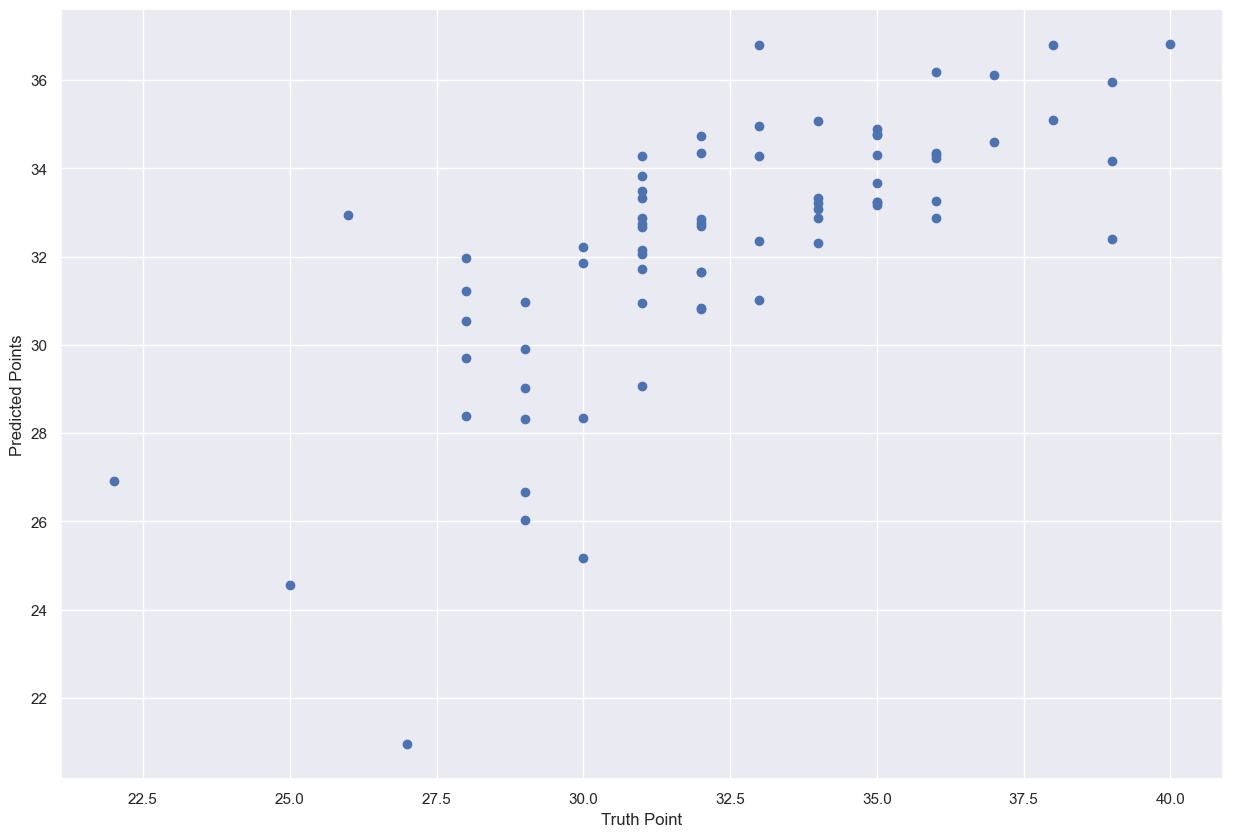

In [47]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Truth Point")
plt.ylabel("Predicted Points")
plt.show()

## Second Assumption 

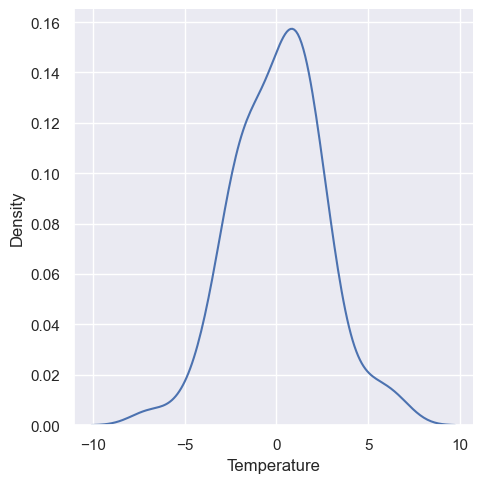

In [49]:
residuals = y_test - ridge_pred
sns.displot(residuals,kind = "kde")

### Third Assumption

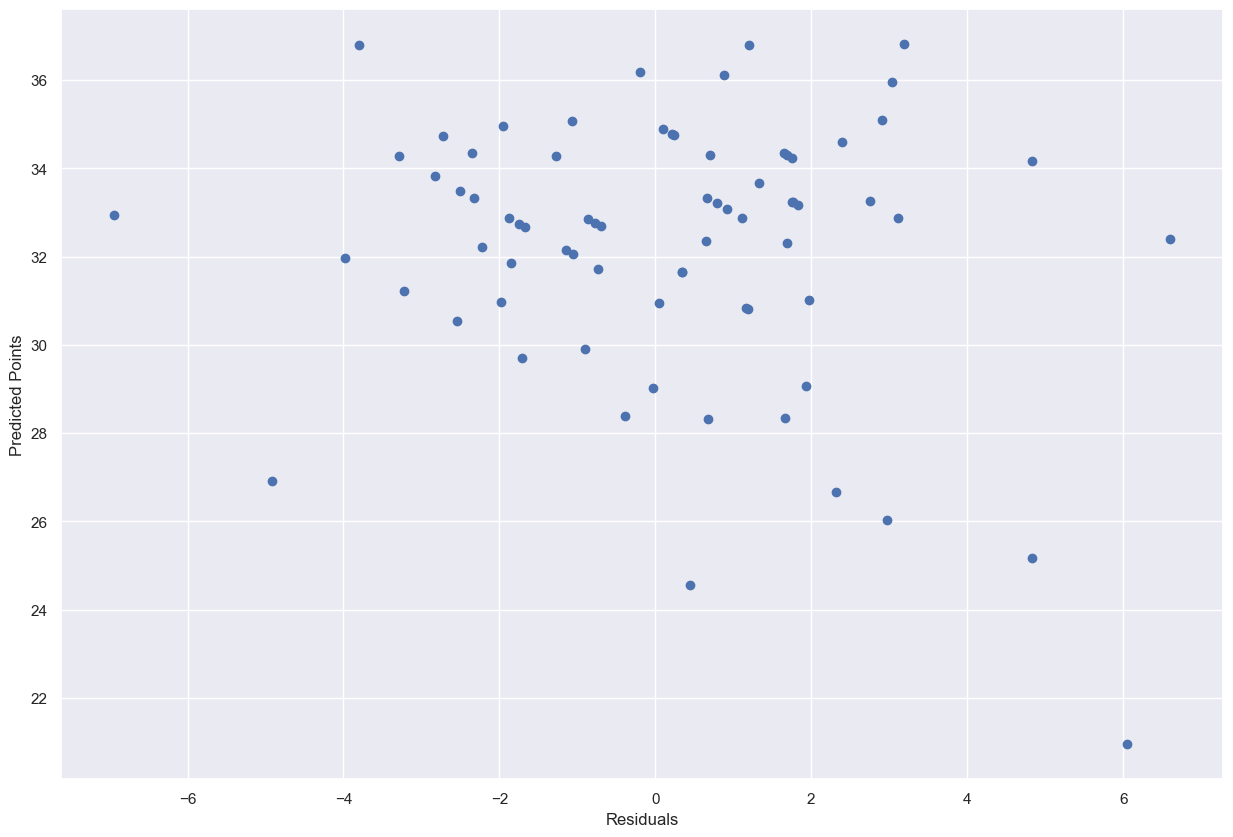

In [50]:
plt.scatter(residuals,ridge_pred)
plt.xlabel("Residuals")
plt.ylabel("Predicted Points")
plt.show()

### R Squared and adjusted R sqaured 

In [51]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_pred)
score

0.5109371061920036

In [52]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.39288744216938387

# 3. Lasso Regression Model 

In [53]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
print(lasso.intercept_)
lasso.coef_

32.04117647058823


array([ 0.        , -0.        ,  0.        , -0.65210487, -0.        ,
       -0.        ,  1.08755359,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [54]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([32.69019997, 33.24544269, 31.20119747, 32.40579749, 32.54699912,
       31.70669742, 31.86214753, 33.8865492 , 30.99963018, 32.62889419,
       31.08615047, 32.47110173, 33.41582753, 33.55140434, 33.26997095,
       32.56193385, 31.41501401, 27.73022539, 32.18235767, 32.90236041,
       31.56977788, 29.93391919, 33.29549883, 30.47060159, 34.51006525,
       33.41351493, 32.47838266, 32.75716032, 27.43554314, 33.05384181,
       31.58733859, 31.38417469, 32.69782402, 32.72832023, 32.56855828,
       32.13464388, 31.75541082, 33.27031407, 28.67991952, 28.56555876,
       32.75915955, 32.77275154, 33.17085829, 27.821714  , 34.14476731,
       32.45451089, 31.78059558, 30.98141299, 33.21063465, 31.24328644,
       34.29990405, 33.48644322, 33.95747826, 32.85792909, 33.36577139,
       32.00434877, 32.1356435 , 33.05980975, 32.14689314, 34.35427202,
       32.89042452, 31.41829648, 30.31712095, 34.71691424, 32.13464388,
       32.73828663, 32.96400931, 33.46422756, 34.13483066, 28.22

# Assumptions
## First Assumption

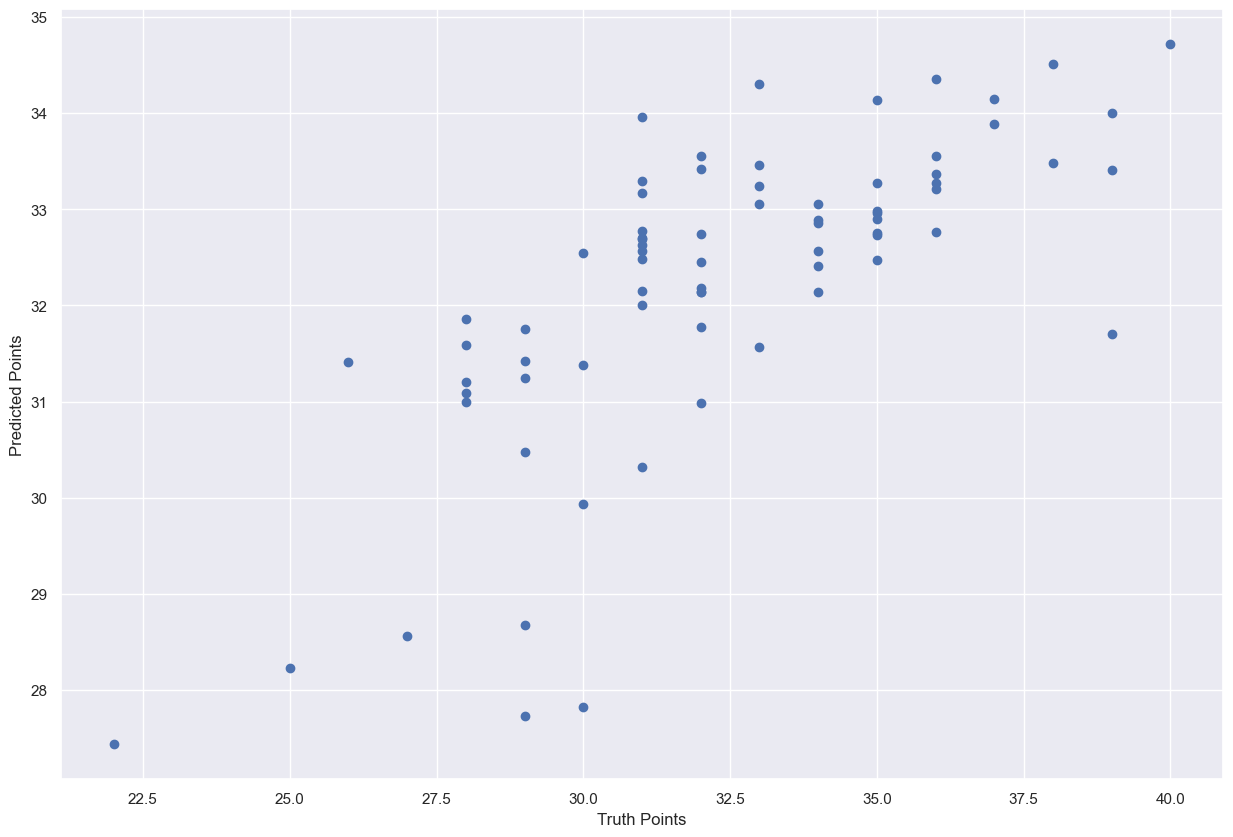

In [55]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Truth Points")
plt.ylabel("Predicted Points")
plt.show()

### Second Assumption

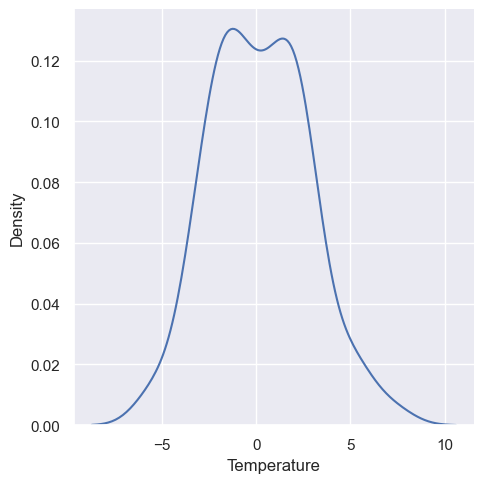

In [56]:
residuals = y_test - lasso_pred
sns.displot(residuals,kind ="kde")

## Third Assumption 

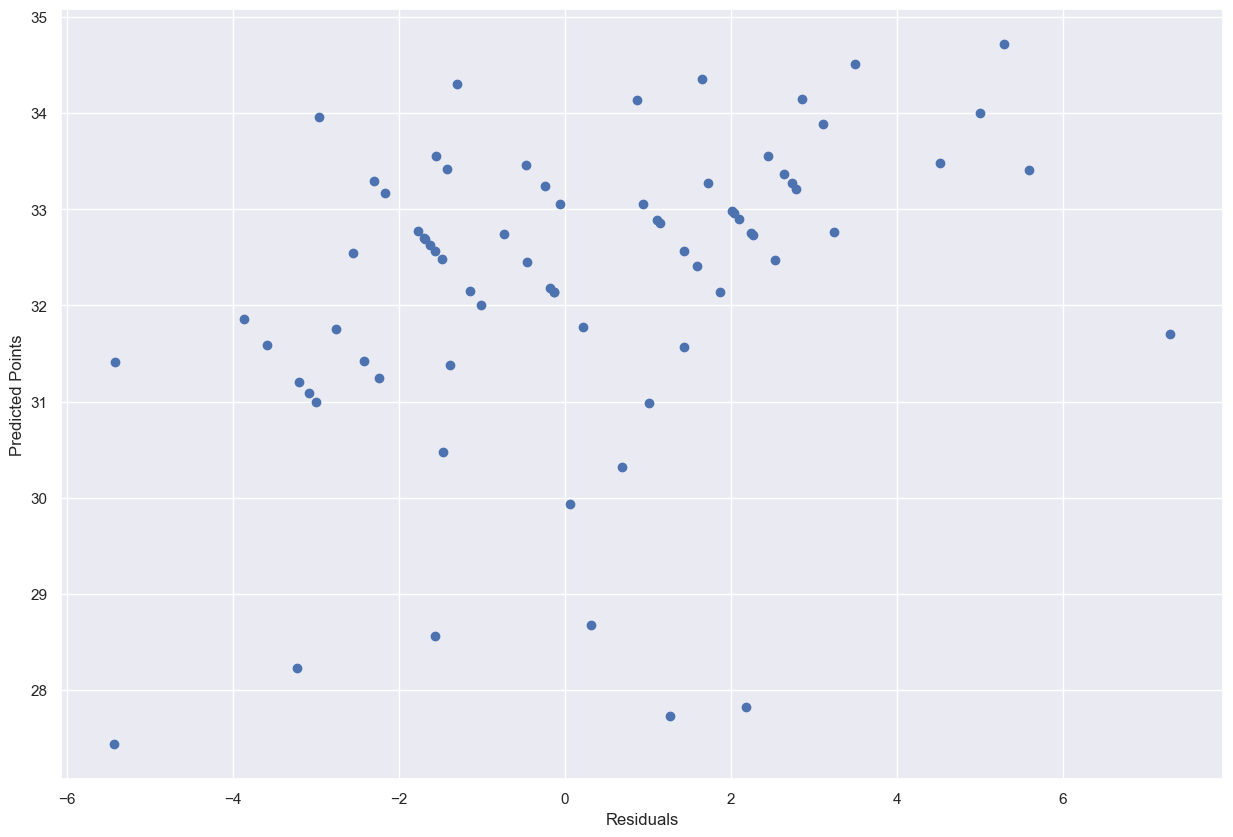

In [57]:
plt.scatter(residuals,lasso_pred)
plt.xlabel("Residuals")
plt.ylabel("Predicted Points")
plt.show()

### R squared and adjusted R squared error

In [58]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lasso_pred)
score

0.4543837034530257

In [59]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3226832180796181

# 4.  ElasticNet Regression Model

In [60]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train,y_train)
print(elastic.intercept_)
elastic.coef_

32.04117647058823


array([-0.        , -0.        ,  0.        , -0.62675812, -0.22498622,
       -0.        ,  0.69959647,  0.09593062,  0.        ,  0.26773045,
        0.06300842,  0.17640915,  0.117818  ,  0.        ])

In [61]:
elastic_pred = elastic.predict(X_test)
elastic_pred

array([32.68382768, 33.30608537, 30.70829679, 32.24995792, 32.55288268,
       31.81982057, 31.50118912, 33.95971   , 30.90240176, 31.87604153,
       30.1399083 , 32.4490071 , 33.62304428, 33.98689829, 33.71003515,
       31.97643478, 32.06609464, 28.36918239, 32.19493648, 32.93987987,
       30.89282183, 29.74501087, 33.19843868, 29.99670122, 35.25569034,
       33.3563056 , 32.42625469, 32.85615244, 28.03744819, 32.89920683,
       31.2980988 , 31.33603867, 32.58406882, 33.00067429, 31.92189713,
       31.70594648, 31.37177715, 33.30083353, 28.87746177, 27.60577338,
       32.87972652, 32.51935599, 33.46327691, 28.16287031, 34.69032835,
       32.35947523, 31.67234433, 30.8179199 , 33.40518214, 30.60224952,
       35.51848618, 33.46097058, 33.98977219, 33.70352341, 33.39976622,
       32.24540854, 31.67128526, 33.00987893, 32.00388521, 34.85509349,
       32.54963972, 30.61573581, 30.26423142, 35.51112951, 31.49726777,
       32.28589207, 32.86986898, 33.25139101, 34.12450904, 28.04

## Assumptions
### First Assumption

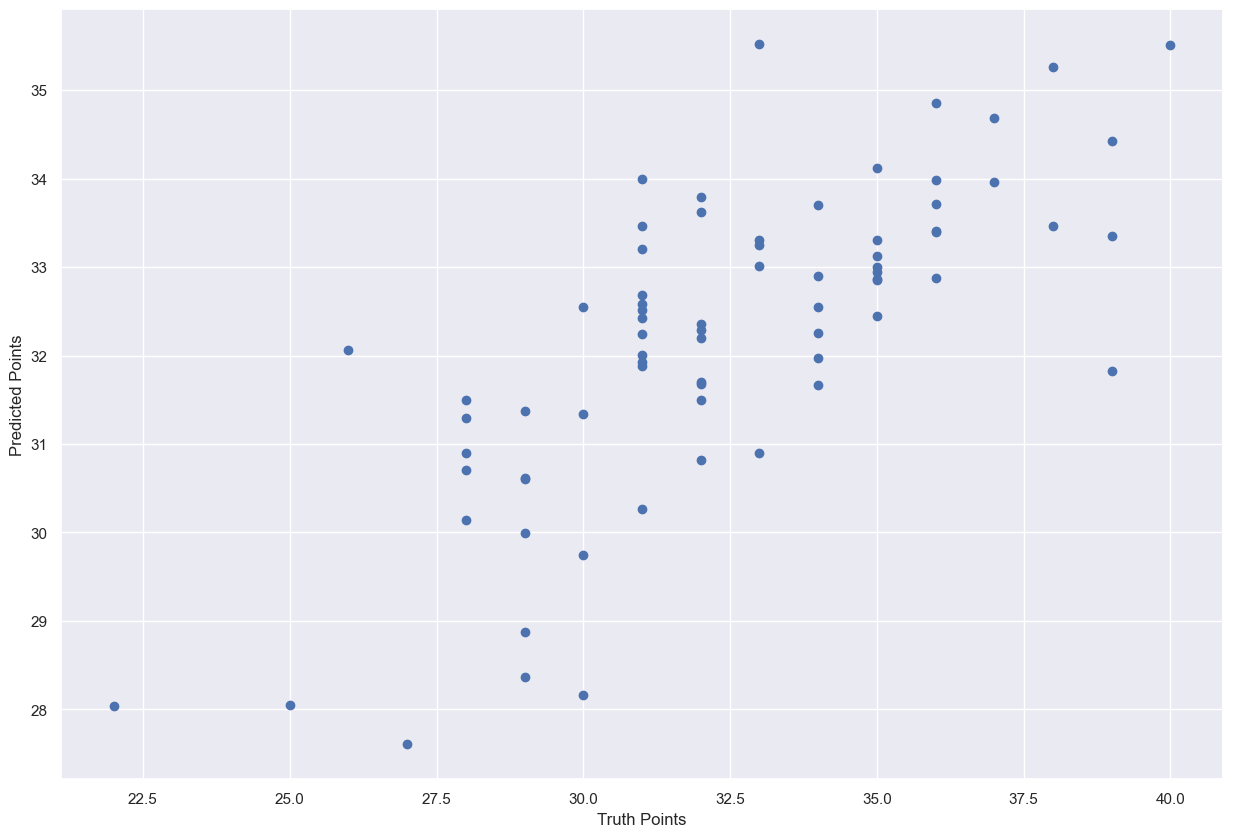

In [62]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("Truth Points")
plt.ylabel("Predicted Points")
plt.show()

## Second Assumption

In [63]:
residuals = y_test - elastic_pred
residuals

24    -1.683828
6     -0.306085
152   -2.708297
232    1.750042
238   -2.552883
         ...   
194    0.875491
104   -3.044876
109   -1.786257
190    4.572217
79     1.870285
Name: Temperature, Length: 73, dtype: float64

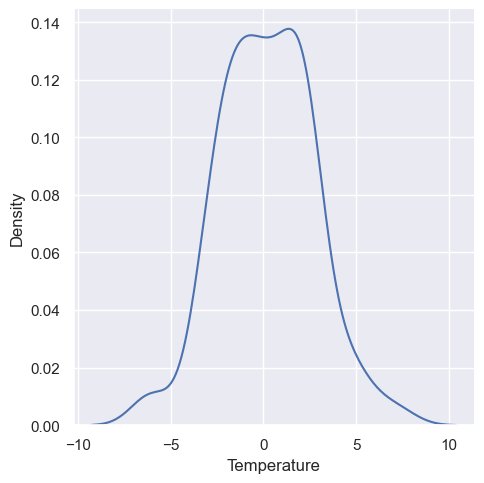

In [65]:
sns.displot(residuals,kind = "kde")

## Third Assumption 

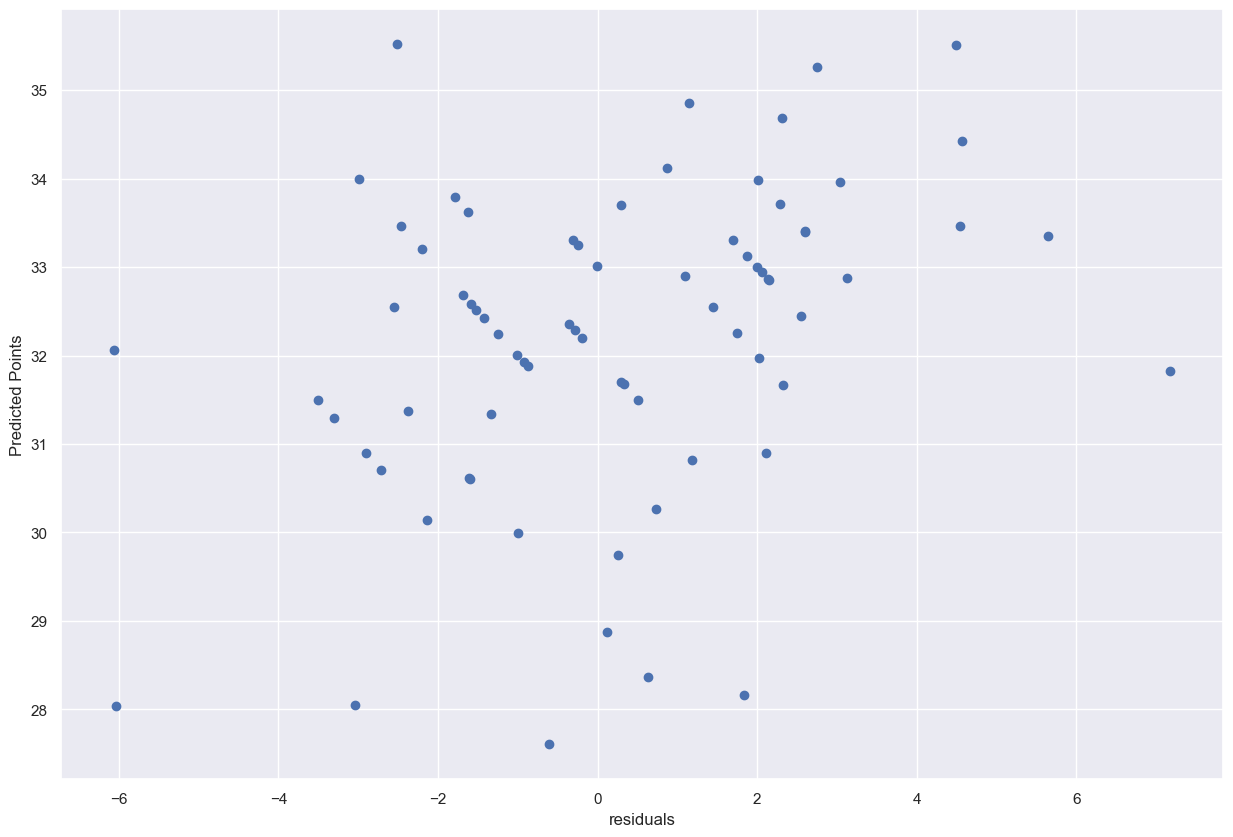

In [66]:
plt.scatter(residuals,elastic_pred)
plt.xlabel("residuals")
plt.ylabel("Predicted Points")
plt.show()

### R squared and adjusted R squared 

In [67]:
from sklearn.metrics import r2_score
score =r2_score(y_test,elastic_pred)
score

0.4925732690797576

In [68]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3700909547196991